In [154]:
# Retrieve dataframe
import os, pandas as pd

# Usage
path_to_root = "/"

path_to_root = os.path.abspath(os.getcwd()) + path_to_root
output_file = "aggreagated_ranking_results.csv"
output_file = path_to_root + output_file

df = pd.read_csv(output_file)

df_low = df[df['dataset'].isin(['dbpedia_entity', 'nfcorpus', 'fiqa'])]

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plots_path = os.path.abspath(os.getcwd()) + "/plots/"


def display_pareto(df, x, ax):
    # Identify and mark the Pareto frontier
    sorted_df = df.sort_values(by=x, ascending=True)
    pareto_front = pd.DataFrame(columns=[x, y])
    current_max = float('-inf')

    for _, row in sorted_df.iterrows():
        if row[y] > current_max:
            pareto_front = pd.concat([pareto_front, pd.DataFrame([row])], ignore_index=True)
            current_max = row[y]

    # # Plotting the Pareto frontier points with a cross
    # ax.scatter(pareto_front[x], pareto_front[y], color='red', marker='x', s=25, linewidth=0.5)  # Adjust size and line width here

    # Connect Pareto points with a dashed line
    if not pareto_front.empty:
        ax.plot(pareto_front[x], pareto_front[y], linestyle='--', color='red',
                linewidth=0.5)  # Adjust color and line width here


def make_small_plot_ranking(df, x, y, color, title=None, diplay_pareto=False, file_name=None):
    # Create a scatter plot
    plt.figure(figsize=(5, 4))
    ax = sns.scatterplot(data=df, x=x, y=y, hue=color)

    plt.xlabel(x)
    plt.ylabel(y)

    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for better fit and adjust font size
    plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left')

    if diplay_pareto:
        display_pareto(df, x, ax)

    plt.tight_layout()  # Adjust layout to make room for label rotation

    if title is not None:
        plt.title(title)
    # Show the plot
    if file_name is not None:
        os.makedirs(os.path.dirname(plots_path + file_name), exist_ok=True)
        plt.tight_layout(pad=0.05)
        plt.savefig(plots_path + file_name, format='png', dpi=500)  # Save figure to file

    plt.show()

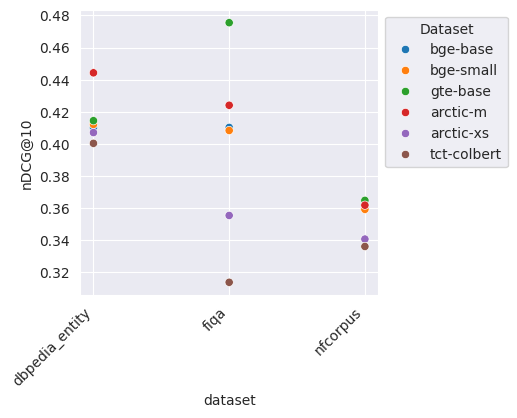

In [156]:
x = 'dataset'
y = 'nDCG@10'
color = 'model'
file_name = "ranking_datasets_group1.png"
make_small_plot_ranking(df_low, x, y, color, file_name=file_name)

In [157]:
df_high = df[df['dataset'].isin(['passage', 'fever', 'hotspotqa', 'quora', 'scifact'])]

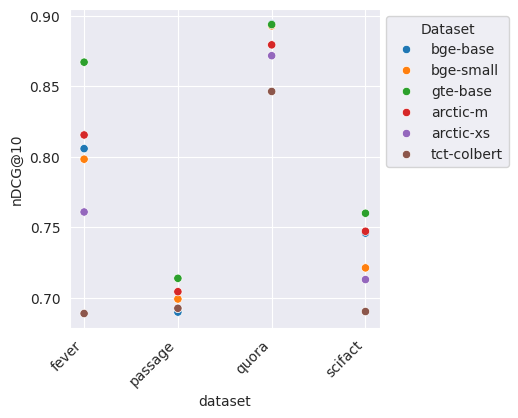

In [158]:
file_name = "ranking_datasets_group2.png"
make_small_plot_ranking(df_high, x, y, color, file_name=file_name)

In [159]:
output_file = "aggreagated_latency_results.csv"
output_file = path_to_root + output_file

df_latency = pd.read_csv(output_file)

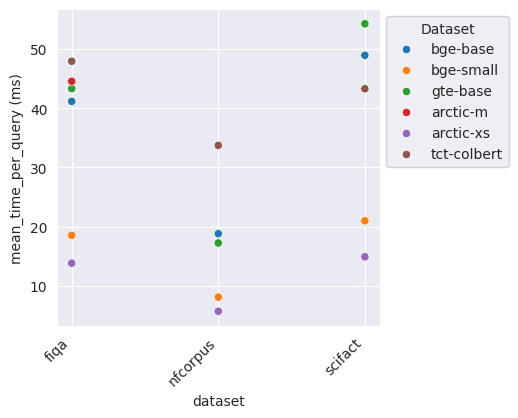

In [160]:
y = 'mean_time_per_query (ms)'
file_name = "latency_all_datasets.png"
make_small_plot_ranking(df_latency, x, y, color, file_name=file_name)

In [161]:
output_file = "aggreagated_ranking_latency_results.csv"
output_file = path_to_root + output_file

df_latency_ranking = pd.read_csv(output_file)
x = 'mean_time_per_query (ms)'
y = 'nDCG@10'

/tmp/ipykernel_17803/1760194738.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



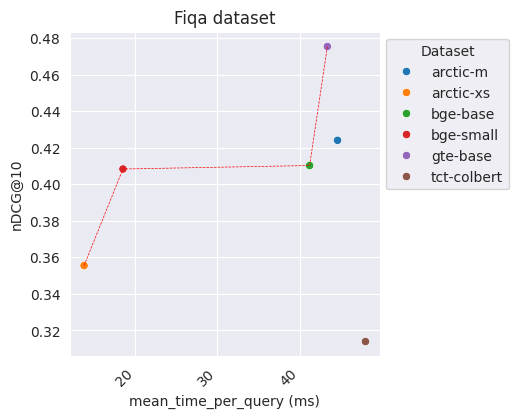

In [162]:
df_latency_ranking_fiqa = df_latency_ranking[df_latency_ranking['dataset'] == 'fiqa']
title = "Fiqa dataset"
file_name = "latency_x_ranking_fiqa.png"
make_small_plot_ranking(df_latency_ranking_fiqa, x, y, color, title, diplay_pareto=True, file_name=file_name)

/tmp/ipykernel_17803/1760194738.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



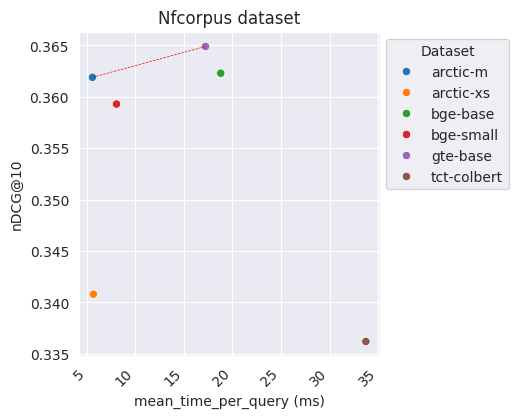

In [163]:
df_latency_ranking_fiqa = df_latency_ranking[df_latency_ranking['dataset'] == 'nfcorpus']
title = "Nfcorpus dataset"
file_name = "latency_x_ranking_nfcorpus.png"
make_small_plot_ranking(df_latency_ranking_fiqa, x, y, color, title, diplay_pareto=True, file_name=file_name)

/tmp/ipykernel_17803/1760194738.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



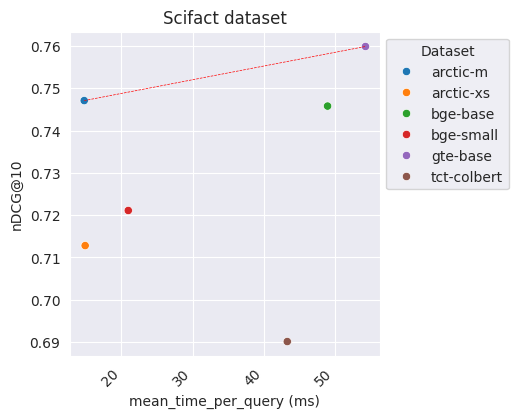

In [164]:
df_latency_ranking_fiqa = df_latency_ranking[df_latency_ranking['dataset'] == 'scifact']
title = "Scifact dataset"
file_name = "latency_x_ranking_scifact.png"
make_small_plot_ranking(df_latency_ranking_fiqa, x, y, color, title, diplay_pareto=True, file_name=file_name)